# <center>CS422 Homework 1</center>
## <center>Christopher W. Hong</center>

## 1 Recitation Exercises

### 1.1 Chapter 1

#### Ex.1

(a) No. The gender of a company's customers are known. Dividing them into groups based on their genders is a trivial query operation.

(b) No. Grouping customers into segments based on their profitability is a trivial accounting task.

(c) No. It is a trivial aggregation operation.

(d) No. It is just a trivial query opeartion. We are not extracting or trying to discover any meaningful patterns.

(e) No. The outcomes of tossing a (fair) pair of dice are governed by the laws of probability. We won't extract any implicit, previously unknown or potentially useful information from this experiment.

(f) Yes. This is one of predicting analysis task of data mining.

(g) Yes. It belongs to the area of anomaly detection.

(h) Yes. This is a classification task of predicting the labels of the monitored seismic waves.

(i) No. It is a trivial data proceesing task.

### 1.2 Chapter 2

#### Ex.2

(a) Binary, qualitative, ordinal

(b) Continuous, quantitative, ratio

(c) Discrete, qualitative, ordinal

(d) Continuous, quantitative, ratio

(e) Discrete, qualitative, ordinal

(f) Continuous, quantitative, ratio

(g) Discrete, quantitative, ratio

(h) Discrete, qualitative, nominal

(i) Discrete, qualitative, ordinal

(j) Discrete, qualitative, ordinal

(k) Continuous, quantitative, interval

(l) Discrete, quantitative, interval

(m) Discrete, qualitative, nominal

#### Ex.7

Daily temperature shows more temporal autocorrelation than daily rainfall. It is more often that physically close locations have more similar values of daily temperature but different amount of daily rainfall.; For example, the amount of rainfall is not as close as the temperature between Chicago, IL and Madison, WI.

#### Ex.15

Sampling scheme (a) refers to stratified sampling with replacement, which each member in each group has equal probability to be selected and equal nubmers of objects are drawn from each group even though the groups are of different sizes. 

Sampling scheme (b) refers to simple random sampling with replacement, which each object has equal probability of being selected, but might fail to adquately represent objects that are less frequent when the population consists of widely different sizes of diffently types of objects.

#### Ex.16

(a) If a term occurs in one document, $log\frac{m}{df_{i}}$ is maximized, so is $tf'_{ij}$; if a term occurs in every document,  $log\frac{m}{df_{i}}$ is basically 0, so is $tf'_{ij}$.

(b) This tranformation puts more weight on distinguishing terms while effectively discounts the importance of common terms, so rare terms have more power to differentiate one document from another.

#### Ex.17

(a) ($a^{2}, b^{2}$)

(b) y = $x^{2}$

#### Ex.18

(a) d(**x**, **y**) = 3; J = $\frac{2}{1 + 2 + 2}$ = $\frac{2}{5}$

(b) The Jaccard measure is more similar to the cosine measure because both of them ignore 0-0 matches. The Hamming distance is moare similar to the Simple Matching Coefficent (SMC) because SMC = $\frac{Hamming}{number of bits}$.

(c) The Jaccard measure would be more appropriate for comparing the genetic makeup of two organisms because it measures the similarity by counting the precences (1-1 matches) and the goal is to measure the number of genes two organisms share. Yet, the Hamming distance is more similar to SMC which counts both presences and absences equally.

(d) Since two human beings share > 99.9% of the same genes, we should focus on their dissimilarites instead. The Hamming distance would be a more appropriate metric in this context.

#### Ex.19

(a) cos(**x**, **y**) = 1, corr(**x**, **y**) = undefined, Euclidean(**x**, **y**) = 2

(b) cos(**x**, **y**) = 0, corr(**x**, **y**) = -1, Euclidean(**x**, **y**) = 2, Jaccard(**x**, **y**) = 0

(c) cos(**x**, **y**) = 0, corr(**x**, **y**) = 0, Euclidean(**x**, **y**) = 2

(d) cos(**x**, **y**) = $\frac{3}{4}$, corr(**x**, **y**) = $\frac{1}{4}$, Jaccard(**x**, **y**) = $\frac{3}{5}$

(e) cos(**x**, **y**) = 0, corr(**x**, **y**) = 0

## 2 Practicum Problems

### 2.1 Problem 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the titanic dateset
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
print('Missing values in age column before imputing:', sum(pd.isna(titanic['age'])))

Missing values in age column before imputing: 177


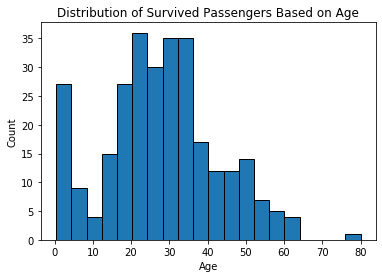

In [5]:
# Create a histogram of survival conditonal on age
titanic[titanic['survived']==1]['age'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Survived Passengers Based on Age")
plt.show();

In [6]:
# Fill the nan values in the age colum
titanic_imputed = titanic.copy()

# Impute missing values in age column with mean
titanic_imputed['age'].fillna(titanic['age'].mean(), inplace=True)
print('Missing values in age column after imputing:', sum(pd.isna(titanic_imputed['age'])))

Missing values in age column after imputing: 0


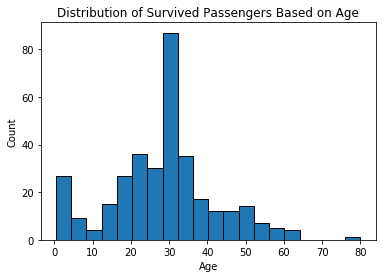

In [7]:
# Create a histogram of survival conditonal on age
titanic_imputed[titanic_imputed['survived']==1]['age'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Survived Passengers Based on Age")
plt.show();

Passengers whose age were ranging from about 20 to 35 had the highest survival rate. Children passengers had the secend highest survivial rate. Passengers who were older than about 50 had decreasing survival rate. The result makes sense since adult passengers aged from 20 to 40 had stronger survival capabilities and children had the highest priority of boarding on the survival boats.

In [8]:
# Transform the sex column from categorical to numerical
titanic_imputed['sex'] = titanic_imputed['sex'].apply(lambda x: 1 if x == 'female' else 0)

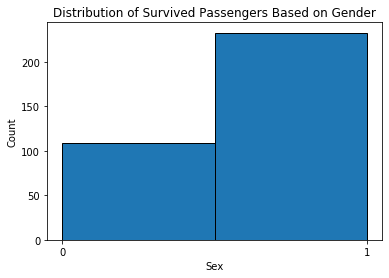

In [9]:
# Create a histogram of survival conditonal on gender
titanic_imputed[titanic_imputed['survived']==1]['sex'].plot(kind='hist', bins=2, edgecolor='black')
plt.xticks([0, 1])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Survived Passengers Based on Gender")
plt.show();

Based on the above histogram, female passengers had much hiher survival rate than male ones. This result totally makes sense since female passerngers had higher priority of boarding on the survival boats.

### 2.2 Problem 2

In [10]:
auto_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower',\
             'weight', 'acceleration', 'year', 'origin', 'model']
auto = pd.read_csv(auto_url, header=None, delim_whitespace=True, names=col_names)

In [11]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [12]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
model           0
dtype: int64

In [13]:
# Replace ? in hosepower column with NaN
idx = auto[auto['horsepower']=='?'].index
auto.loc[idx, 'horsepower'] = np.nan

In [14]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
model           0
dtype: int64

In [15]:
# Conver the horsepower feature from object to numeric
auto['horsepower'] = pd.to_numeric(auto['horsepower'])

In [16]:
# Calcute summary statistics for each numerical column
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [17]:
from sklearn.impute import SimpleImputer

# Replace the missing values with mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imp_horsepower_ = imp_mean.fit_transform(auto[['horsepower']])

# Calculate the variance of horsepower
print("Variance of horsepower imputed with mean:", np.var(mean_imp_horsepower_))

Variance of horsepower imputed with mean: 1455.511639831812


In [18]:
# Replace the missing values with median
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
median_imp_horsepower = imp_median.fit_transform(auto[['horsepower']])

# Calculate the variance of horsepower
print("Variance of horsepower imputed with median:", np.var(median_imp_horsepower))

Variance of horsepower imputed with median: 1457.2982752960781


In [19]:
# Replace the missing values with mean
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode_imp_horsepower = imp_mode.fit_transform(auto[['horsepower']])

# Calculate the variance of horsepower
print("Variance of horsepower imputed with mode:", np.var(mode_imp_horsepower))

Variance of horsepower imputed with mode: 1486.29231585061


The mean imputation results in the lowest variance since missing values are transform to the mean value. Base on the the formula of variance, this method has the lowest variance.

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


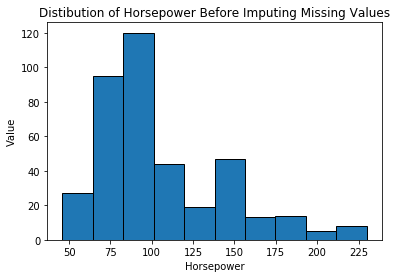

In [20]:
# Distribution of the horsepower column before imputing missing values
plt.hist(auto['horsepower'], bins=10, edgecolor='black')
plt.xlabel("Horsepower")
plt.ylabel("Value")
plt.title("Distibution of Horsepower Before Imputing Missing Values")
plt.show();

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputing missinv values in horsepower column with iterative
auto_imputed = auto.copy(deep=True)

# Initialize InterativeImputer
iter_imp = IterativeImputer()

# Impute missing values and exclude the object type features
auto_imputed.iloc[:,:-1] = iter_imp.fit_transform(auto.iloc[:,:-1])

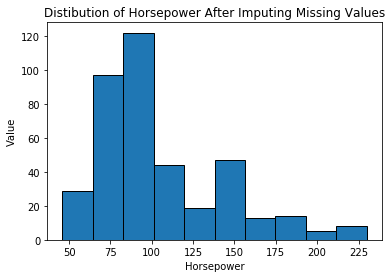

In [22]:
# Distribution of the horsepower column before imputing missing values
plt.hist(auto_imputed['horsepower'], bins=10, edgecolor='black');
plt.xlabel("Horsepower")
plt.ylabel("Value")
plt.title("Distibution of Horsepower After Imputing Missing Values")
plt.show();

In [23]:
auto_imputed.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
model           0
dtype: int64

The idea behiad iterative imputing is similar to KNN algorithm by imputing missing values with estimates as a function of other features. Thus, the distribution is matched more accurately.

### 2.3 Problem 3

In [24]:
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target

In [25]:
from sklearn.decomposition import PCA

# Perform a PCA on iris
pca = PCA()
pca = pca.fit(X)

In [26]:
# Percentage of variance explained by each of the PCs
for i in range(4):
    print('Percentage of variance explained by PC{}: {}:'.\
          format(i, pca.explained_variance_ratio_[i] * 100))

Percentage of variance explained by PC0: 92.46187232017272:
Percentage of variance explained by PC1: 5.306648311706774:
Percentage of variance explained by PC2: 1.7102609807929758:
Percentage of variance explained by PC3: 0.5212183873275374:


In [27]:
# Variance explained by each of the original features
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
mean_X = np.mean(X, axis=0)
cov_mat = (X - mean_X).T @ (X - mean_X) / (X.shape[0] - 1)
cov_X = np.zeros(4)
for i in range(len(cov_mat)):
    for j in range(len(cov_mat)):
        if i == j:
            cov_X[i] = cov_mat[i,j]
for i in range(4):
    print('Percentage of variance explained by {}: {}'.\
          format(feature_names[i], cov_X[i] / np.sum(cov_X) * 100))

Percentage of variance explained by sepal length: 14.994532099467353
Percentage of variance explained by sepal width: 4.154410732328824
Percentage of variance explained by petal length: 68.14579319976531
Percentage of variance explained by petal width: 12.705263968438512


The 1st principal component accounts for most of the variances (92.5%), the 2nd for only 5.3%, and the last two components for just 2.2%.

Petal length accounts for most of the variances (68.1%). sepal length for 15.0%, petal width for 12.7% and sepal width for just 4.2%.  

### 2.4 Problem 4

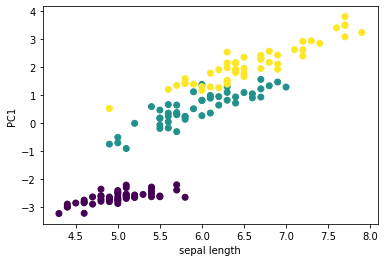

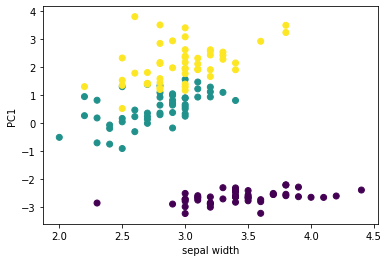

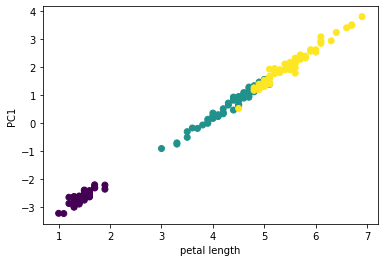

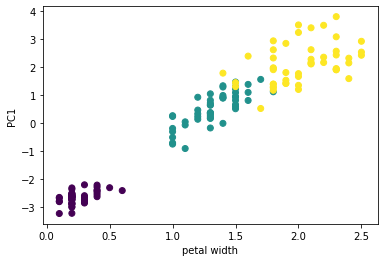

In [28]:
# Plot the 1st PC vs. each of the original feature
trans_X = pca.transform(X)
for i in range(X.shape[1]):
    plt.scatter(X[:,i], trans_X[:,0], c=y)
    plt.ylabel("PC1")
    plt.xlabel(feature_names[i])
    plt.show();

Petal length shows the closest relationship to PC1 becaise the angle $\theta$ is the smallest comparing to other pairs. Then sepal length and petal width show almost same relationship to PC1. Yet, sepal width shows almost no relationship to PC1.

In [29]:
# Calculate the correlation coefficient between the pair of eatures and their proejctions onto PC1
for i in range(4):
    print("Correlation coefficient between {} and {}: {}".format(\
        "PC1", feature_names[i], np.corrcoef(X[:,i], trans_X[:,0])[0][1]))

Correlation coefficient between PC1 and sepal length: 0.8974017619582987
Correlation coefficient between PC1 and sepal width: -0.3987484724557001
Correlation coefficient between PC1 and petal length: 0.997873942241311
Correlation coefficient between PC1 and petal width: 0.9665475167033072


The results of the correlation coefficient agree with the visual inspection.

### 2.5 Problem 5

In [30]:
for i in range(len(feature_names)):
    print('Variance of {}: {}'.format(feature_names[i], cov_X[i]))  
print('Total variance of the original features:', np.sum(cov_X))

Variance of sepal length: 0.6856935123042505
Variance of sepal width: 0.1899794183445188
Variance of petal length: 3.1162778523489942
Variance of petal width: 0.5810062639821029
Total variance of the original features: 4.572957046979867


In [31]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
for i in range(len(eig_vals)):
    print('Variance of {}: {}'.format('PC'+str(i), eig_vals[i]))
print('Total variance of the four eigenvectors:', sum(eig_vals))

Variance of PC0: 4.228241706034865
Variance of PC1: 0.24267074792863377
Variance of PC2: 0.078209500042919
Variance of PC3: 0.023835092973450406
Total variance of the four eigenvectors: 4.572957046979869


The total variance of the original features equals the total variance of the four eigenvectors.

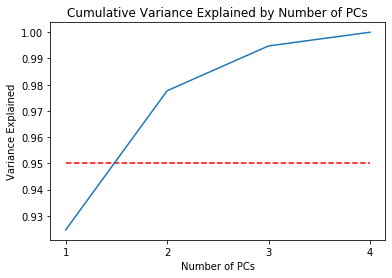

In [32]:
# Plot the cumulative variance explained by PCs
pcs = range(1, len(eig_vals)+1)
plt.plot(pcs, np.cumsum(eig_vals)/np.sum(eig_vals))
plt.hlines(y=0.95, xmin=1, xmax=4, colors='r', linestyles='dashed')
plt.xlabel('Number of PCs')
plt.ylabel('Variance Explained')
plt.title('Cumulative Variance Explained by Number of PCs')
plt.xticks(pcs)
plt.show()

From the above graph, 2 principal components would be seleted if we wished to capture > 95% of the variance of the original data.

The number 2 corresponds to the number of dimensions we are reducing our features to.